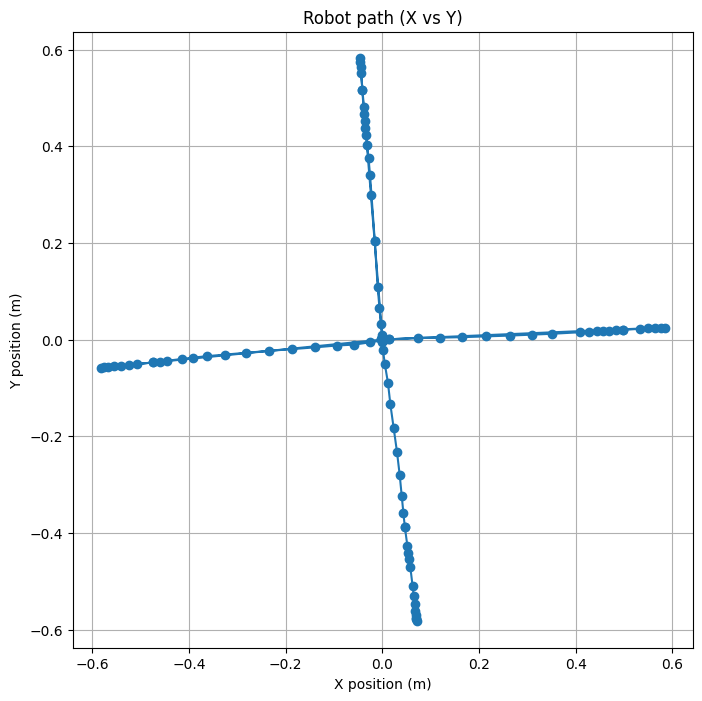

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("./robot_log_15_55_34_P1-6_I0-3_D3.csv")

# แปลง timestamp ให้อ่านง่าย (เป็นวินาทีเริ่มต้น)
start_time = df['time'].iloc[0]
df['time_sec'] = df['time'] - start_time

# Plot 1: กราฟ XY แสดงเส้นทางหุ่น (ตำแหน่ง x,y)
plt.figure(figsize=(8,8))
plt.plot(df['x'], df['y'], marker='o')
plt.title('Robot path (X vs Y)')
plt.xlabel('X position (m)')
plt.ylabel('Y position (m)')
plt.grid(True)
plt.axis('equal')  # ทำให้สเกล x,y เท่ากันเพื่อดูรูปทรง
plt.show()

Found 52 CSV files.


C:\Users\User\AppData\Local\Temp\ipykernel_24228\1337261530.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


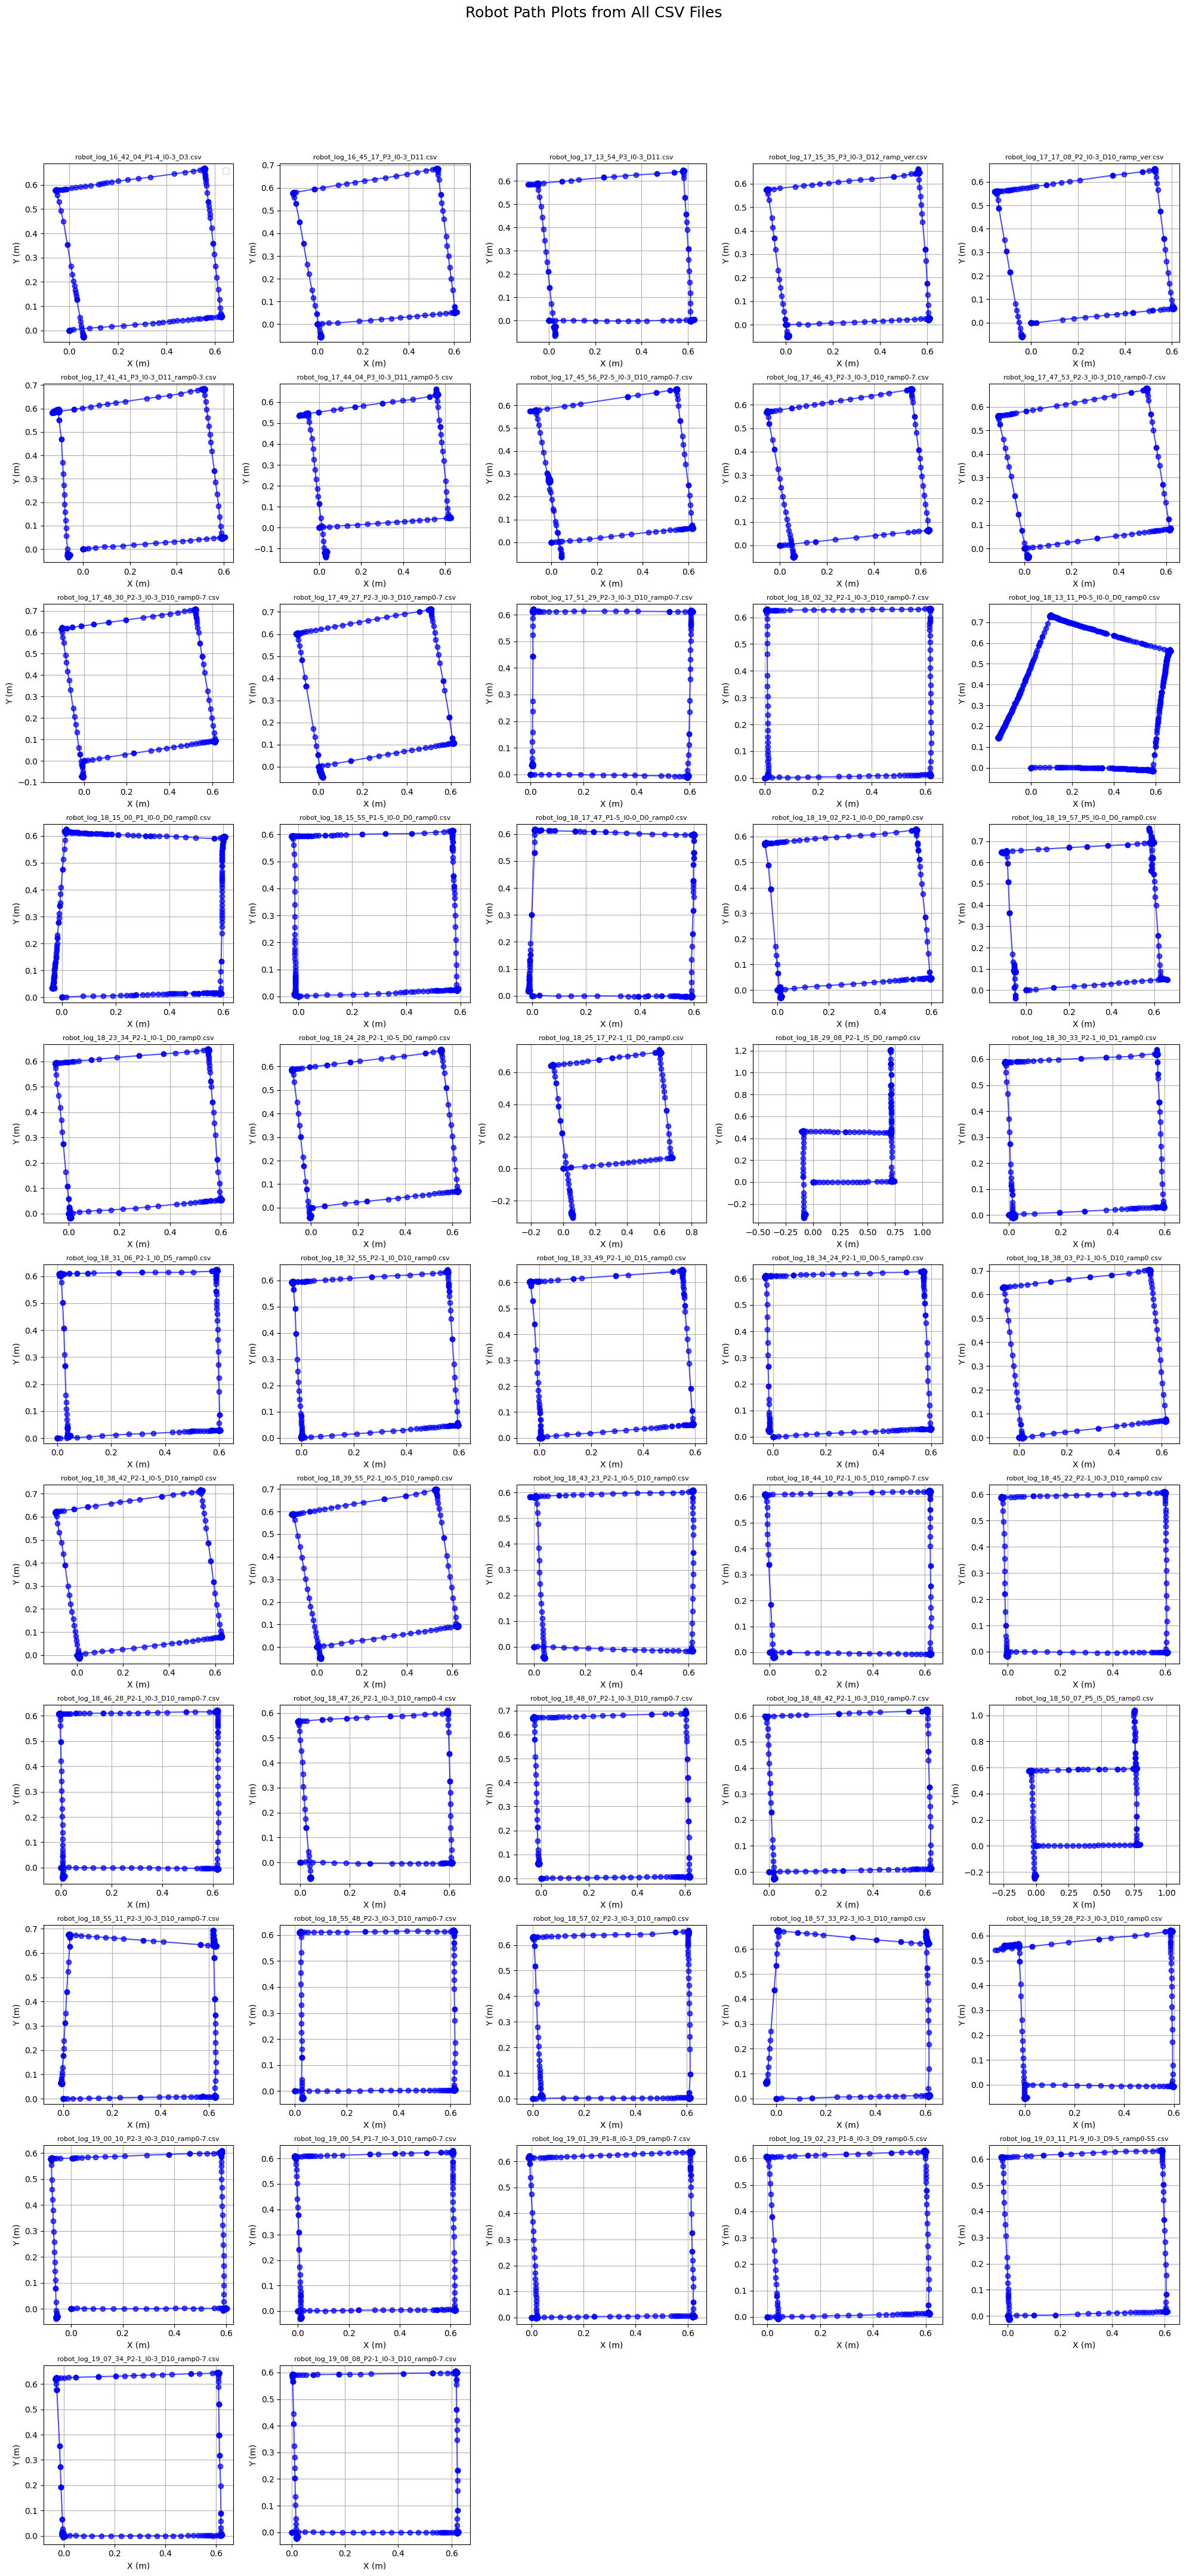

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

# กำหนดโฟลเดอร์ที่เก็บไฟล์ CSV
folder_path = '.'  # ปรับเป็น path ที่ต้องการ เช่น './logs' ถ้าอยู่ในโฟลเดอร์ย่อย

# หาทุกไฟล์ .csv ในโฟลเดอร์นั้น
filenames = sorted(glob.glob(os.path.join("C:/Users/User/.vscode/AI2.1/robot/work/J.Thanet/Draw_square/data", "robot_log_*.csv")))

# ตรวจสอบจำนวนไฟล์ที่พบ
n_files = len(filenames)
print(f"Found {n_files} CSV files.")

# กำหนด layout subplot
n_cols = 5
n_rows = (n_files + n_cols - 1) // n_cols

# สร้าง subplot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows))
axes = axes.flatten()  # เปลี่ยนให้ใช้ index เดียวกันง่าย

# พล็อตแต่ละไฟล์
for i, filename in enumerate(filenames):
    try:
        df = pd.read_csv(filename)
        x = df['x'].values
        y = df['y'].values

        ax = axes[i]
        ax.plot(x, y, marker='o', linestyle='-', color='blue', alpha=0.7)
        ax.set_title(os.path.basename(filename), fontsize=8)
        ax.set_xlabel("X (m)")
        ax.set_ylabel("Y (m)")
        ax.grid(True)
        ax.axis('equal')

        if i == 0:
            ax.legend()

    except Exception as e:
        print(f"Error in file {filename}: {e}")
        continue

# ลบช่อง subplot ที่ไม่ได้ใช้
for j in range(len(filenames), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Robot Path Plots from All CSV Files", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()
